In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import math
import time
%matplotlib inline
import numpy as np

In [28]:
size = 100

# multivariate N(mean = location, covariance)
    # diagonalni 25 I
    
data = np.random.multivariate_normal(mean=[50, 50, 0],
                                             cov=[[25, 0, 0],[0,25,0], [0, 0, 25]],
                                             size=size)

In [29]:
data.shape

(100, 3)

In [30]:
plt.plot3(data[:,0], data[:,1], 'b.')

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot3'

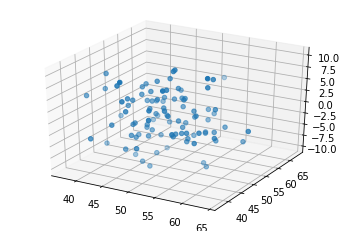

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data[:,0], data[:,1], data[:,2])
plt.show()

In [38]:
X_clean = np.random.normal(loc=0, scale=10, size=(100,3))

In [39]:
X_clean.shape

(100, 3)

# TESTOVANI GENEROVANI DAT

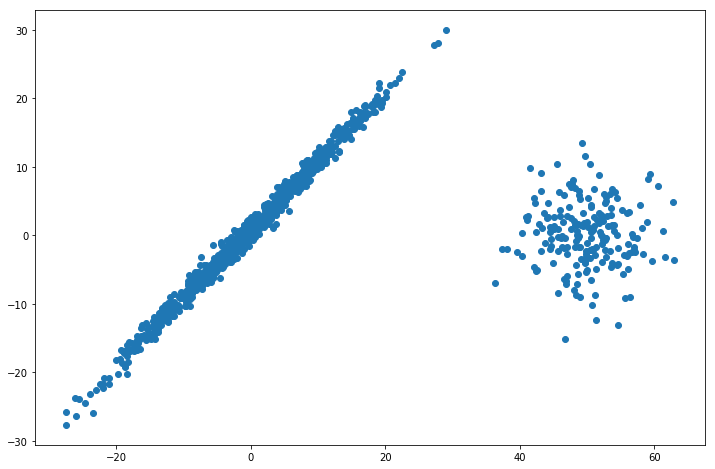

In [82]:
# LINEAR DATA
# data generated same way as in Rousseeuw and Driessen 2000
X_original = np.random.normal(loc=0,scale=10, size=800) # var = 100
e = np.random.normal(loc=0,scale=1, size=800) # var = 1
y_original = 1 + X_original + e

# OUTLIERS
# multivariate N(mean = location, covariance)
# diagonalni 25 I
outliers = np.random.multivariate_normal(mean = [50, 0], 
                                         cov = [[25, 0], [0, 25]], 
                                         size=200)

# FINAL DATA
X = np.concatenate((X_original,outliers.T[0]), axis=0)
y = np.concatenate((y_original,outliers.T[1]), axis=0)

plt.figure(figsize=(12,8))
plt.scatter(x=X, y=y)

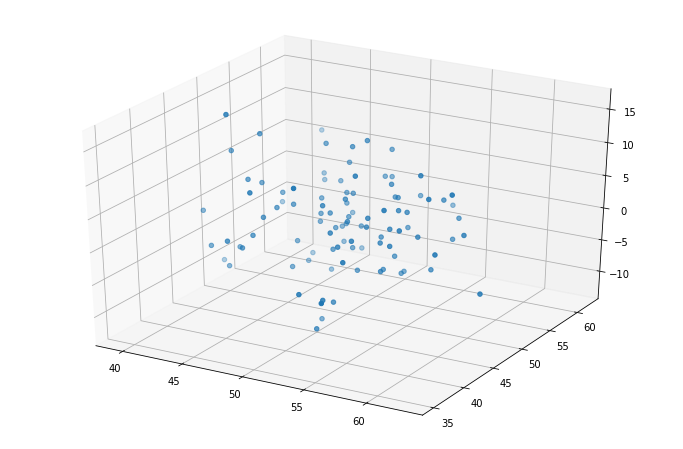

In [379]:
size = 100

# multivariate N(mean = location, covariance)
    # diagonalni 25 I
    
data = np.random.multivariate_normal(mean=[50, 50, 0],
                                             cov=[[25, 0, 0],[0,25,0], [0, 0, 25]],
                                             size=size)
# plt.plot3(data[:,0], data[:,1], 'b.')
# plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, projection='3d')


ax.scatter(data[:,0], data[:,1], data[:,2])
plt.show()
X_clean = np.random.normal(loc=0, scale=10, size=(100,3))

In [ ]:
# >>> DISCRETE <<<

# binomial(n, p[, size])	Draw samples from a binomial distribution.
# geometric(p[, size])	Draw samples from the geometric distribution.
# hypergeometric(ngood, nbad, nsample[, size])	Draw samples from a Hypergeometric distribution.
# logseries(p[, size])	Draw samples from a logarithmic series distribution.
# multinomial(n, pvals[, size])	gneralized binomial
# negative_binomial(n, p[, size])	Draw samples from a negative binomial distribution.
# poisson([lam, size])	Draw samples from a Poisson distribution.
# power(a[, size])	Draws samples in [0, 1] from a power distribution with positive exponent a - 1.
# zipf(a[, size])	Draw samples from a Zipf distribution.


# WTF

# triangular(left, mode, right[, size])	Draw samples from the triangular distribution over the interval [left, right].
# uniform([low, high, size])	Draw samples from a uniform distribution.


# MULTIVARIATE

# dirichlet(alpha[, size])	multivariate generalisation of the Beta distribution
# multivariate_normal(mean, cov[, size, …)	Draw random samples from a multivariate normal distribution.

In [ ]:
# >>> CONTINUOUS <<<

# normal([loc, scale, size])	Draw random samples from a normal (Gaussian) distribution.
# laplace([loc, scale, size])	roste z obou stran do spicky
# logistic([loc, scale, size])	Draw samples from a logistic distribution.
# vonmises(mu, kappa[, size])	Draw samples from a von Mises distribution.


# "TWO TAILED tailed"
# standard_cauchy([size])
# standard_t(df[, size])    Student’s


# " ONE TAILED"
# pareto(a[, size]) Pareto II or Lomax distribution with specified shape.
# lognormal([mean, sigma, size])
# weibull(a[, size])


# EXPONENTIAL 
# exponential([scale, size])
# standard_exponential([size])
# beta(a, b[, size])
# gamma(shape[, scale, size])
# wald(mean, scale[, size])			Wald, or inverse Gaussian.


# NORMAL ((skewed and asymmetric))
# chisquare(df[, size])
# noncentral_chisquare(df, nonc[, size]) noncentral chi-square distributionga
# f(dfnum, dfden[, size])
# noncentral_f(dfnum, dfden, nonc[, size])  noncentral F distribution
# standard_gamma(shape[, size])
# gumbel([loc, scale, size])	Draw samples from a Gumbel distribution.
# rayleigh([scale, size])	Draw samples from a Rayleigh distribution.

In [ ]:
# >> COMMON DISTRUBUTIONS (copy from above)

# normal([loc, scale, size])	Draw random samples from a normal (Gaussian) distribution.


# ONE SIDE SKEWED -- TO BYCH REKL ZE CHCEME

# exponential([scale, size])    -- chybovst 
# gamma(shape[, scale, size])   -- waiting times

# NAVIC HEAVILY TAILED

# lognormal([mean, sigma, size]) -- chybovost

In [40]:
# generate y (can produce vertical outliers)
# normal, exponential, lognormal
def generate_y(X, mu, sigma, distribution='n'): 
    # SD (s) := standard deviation := sigma := scale   Standard deviation (spread or “width”) of the distribution.
    # E := expected value ~ mean := mu      := loc     Mean (“centre”) of the distribution.
    
    if(distribution == 'n'):
        e = np.random.normal(mu, sigma, (X.shape[0], 1))
    elif(distribution == 'ln'):
        e = np.random.lognormal(mu, sigma, (X.shape[0], 1))
    else:
        e = np.random.exponential(sigma, (X.shape[0], 1))
        
    y = np.concatenate((X, e), axis=1)
    y = np.sum(y, axis=1)
    return y
    

def generate_dataset(n, p,                 # X \in R^{n x p}
                     outlier_ratio=0.3,    # ratio of the outliers in the whole data set
                     leverage_ratio = 0.1, # ratio of data outlying in x , in the whole dataset
                     x_ms = (0,10),        # not outlying x  ~ N(mean, sd)
                     x_lav_ms = (100,10),  # outlying x  ~ N(mean, sd)
                     e_ms = (0, 1),        # not outlying y  e ~ N(mean, sd)
                     e_out_ms = (-1,400),  # outlying y   e ~ N(mean, std)  or  ~Exp(std)   'n'   'e'
                     e_out_dist='n',       # n/ln/e distribution of e for outying y
                     outlier_secon_model_ratio = 0.5, # ratio of outlers which are not outling in (y) but instead are form comletely different model  (if 0, data only from one model)
                     coeff_scale=50,       # random vector of regression coefficients c \in { (-coeff_scale, coeff_cale)^p } \ 0  , so that yi = c xi.T + e
                     mod2_x_ms = (0,10),   # second model  x~N(m,s)
                     mod2_e_ms = (0,1)):   # second model e~N(m,s)
    
    # Calculate number of elements in each catogry (probability tree diagram)
    
    # depth 1
    N_clean = int(math.floor(n * (1 - outlier_ratio)))
    N_dirty = n - N_clean
    
    # depth 2
    _N_clean_lav = int(math.floor(N_clean * leverage_ratio))
    _N_clean_non_lav = N_clean - _N_clean_lav
    
    # depth 2                        
    N_dirty_lav = int(math.floor(N_dirty * leverage_ratio))
    N_dirty_non_lav = N_dirty - N_dirty_lav
                 
    # depth 3
    _N_dirt_lav_y = int(math.floor(N_dirty_lav * (1 - outlier_secon_model_ratio)))
    _N_dirt_lav_model2 = N_dirty_lav - _N_dirt_lav_y
    
    # depth 3
    _N_dirty_non_lav_y = int(math.floor(N_dirty_non_lav * (1 - outlier_secon_model_ratio)))
    _N_dirty_non_lav_model2 = N_dirty_non_lav - _N_dirty_non_lav_y
    
    
    
    # GENERATE X
    
    # X clean && laverage
    mu, sigma = x_lav_ms
    X_clean_lav = np.random.normal(mu,sigma, (_N_clean_lav, p))
    
    # X clean && non laverage
    mu, sigma = x_ms
    X_clean_non_lav = np.random.normal(mu,sigma, (_N_clean_non_lav, p))
    
    
    
    # X dirty && laverage && y_out
    mu, sigma = x_lav_ms
    X_dirty_lav_y = np.random.normal(mu,sigma, (_N_dirt_lav_y, p))
    
    # X dirty && laverage && model2
    mu, sigma = x_lav_ms
    X_dirty_lav_model2 = np.random.normal(mu,sigma, (_N_dirt_lav_model2, p))

    
    
    # X dirty && non laverage && y_out
    mu, sigma = x_ms
    X_dirty_non_lav_y = np.random.normal(mu,sigma, (_N_dirty_non_lav_y, p))
    
    # X dirty && non laverage && model2
    # mu, sigma = x_ms - todo zmena
    mu, sigma = mod2_x_ms
    X_dirty_non_lav_model2 = np.random.normal(mu,sigma, (_N_dirty_non_lav_model2, p))

    
    # CONCATENATE clean data, outliers 1.type and outliers 2.type
    X_clean = np.concatenate((X_clean_lav, X_clean_non_lav), axis=0)     
    X_dirty_y = np.concatenate((X_dirty_lav_y, X_dirty_non_lav_y), axis=0)        
    X_dirty_model2 = np.concatenate((X_dirty_lav_model2, X_dirty_non_lav_model2), axis=0)
    
 
    
    # Create the outliers of 1st type (second model)  (( this can be easily modified to create d different models ... )))
    
    # first, generate random coefficients
    coefficients = np.random.randint(low=1, high=coeff_scale, size=p)
    for i in coefficients.shape:
        if np.random.rand() >= 0.5:
            coefficients[i-1] = -1 * coefficients[i-1] * np.random.rand()
        
    # second, multiply columns of X with those coefficients
    X_dirty_model2_tmp = np.multiply(coefficients, X_dirty_model2)   

    
    
    # GENERATE Y
    
    # Y clean
    mu, sigma = e_ms
    y_clean = generate_y(X_clean, mu=mu, sigma=sigma, distribution='n')
        
    # Y dirty_y
    mu, sigma = e_out_ms
    y_dirty_y = generate_y(X_dirty_y, mu=mu, sigma=sigma, distribution=e_out_dist)
    
    
    # Y dirty(clean) second model
    # mu, sigma = e_ms   todo -zmena
    mu, sigma = mod2_e_ms
    y_dirty_model2 = generate_y(X_dirty_model2_tmp, mu=mu, sigma=sigma, distribution='n')
    
    
    
     # Concatenate DATASET
    X = np.concatenate((X_clean, X_dirty_y, X_dirty_model2), axis=0)
    y = np.concatenate((y_clean, y_dirty_y, y_dirty_model2), axis=0)
    y = np.reshape(y, [y.shape[0], 1])
    y_clean = np.reshape(y_clean, [y_clean.shape[0], 1])
    
    
    # Shuffle rows of dirty data...
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X = X[s]
    y = y[s]
    
    
    return X, y, X_clean, y_clean, X_dirty_y, y_dirty_y
    

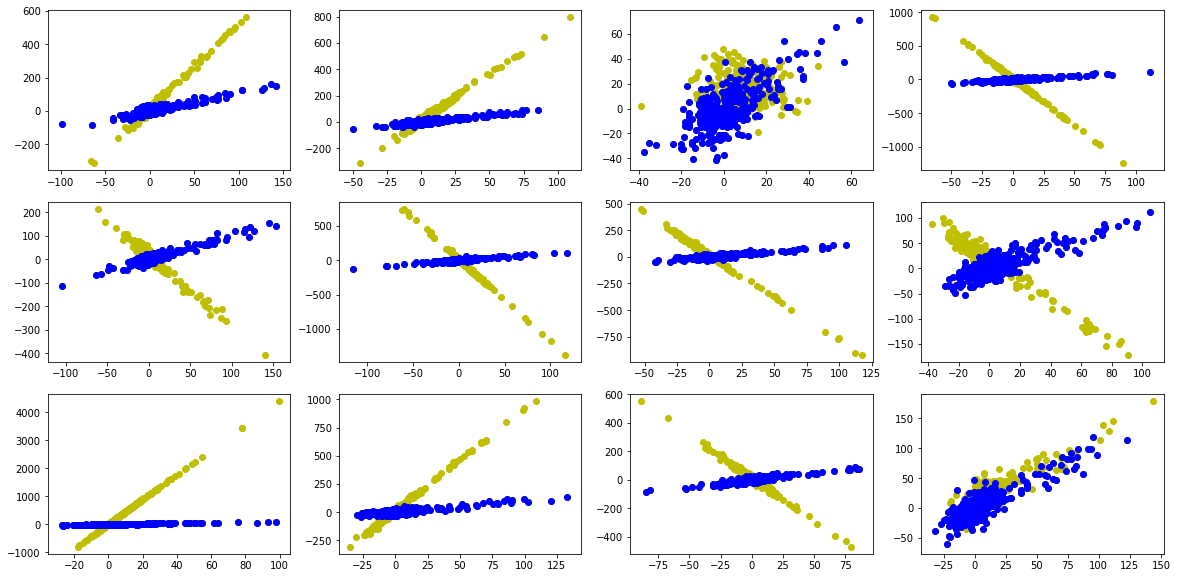

In [45]:


# plot it all ######################
i = 1
plt.figure(figsize=(20,10))       # set dimensions of the figure
for j in range(12):
    plt.subplot(3,4, i)         # create subplots on a grid with 3 rows and 3 columns

    # PRESET
    n = 500
    p = 1
    outlier_ratio = 0.4
    leverage_ratio = 0.2
    outlier_secon_model_ratio = 1
    
    # RANDOM - tak to tady generuji najak nahodne, ty rozsahy jsem si naprosto vycucal z prstu...
    
    # MODEL
    # model X ~ N(m,s)
    x_m = 0
    x_s = 10
    
    # errors e~N(m,s)
    e_m = 0
    e_s = np.random.randint(low=10, high=15) 
    
    # errors outliers e~N(m,s) or e~Exp(s)
    e_out_m = np.random.randint(low=-50, high=50)
    e_out_s = np.random.randint(low=50, high=200)
    
    # leverage points
    x_lav_m = np.random.randint(low=10, high=50)
    x_lav_s = np.random.randint(low=10, high=50)
   

    # SECOND MODEL
    # second model X ~ N(m,s)
    x2_m = np.random.randint(low=-10, high=10) 
    x2_s = 10
    
    # second model errors e~N(m,s)
    e2_m = 15
    e2_s = np.random.randint(low=10, high=15) 
    
    
    
    coeff_scale = np.random.randint(low=5, high=50)
    
    if np.random.rand() >= 0.5:
        e_out_dist = 'n'
    else:
        e_out_dist = 'e'
    
    # print(str(x_s) + ', ' + str(x_lav_m) + ', ' +  str(x_lav_s) + ', ' +  str(x_lav_m) + ', ' +  str(e_m) + ', ' +  str(e_s) + ', ' +  str(e_out_m) + ', ' +  str(e_out_s) + ', ' + str(coeff_scale))
    
    X, y, X_clean, y_clean, x_2, y_2 = generate_dataset(n, p,              # n x p
                                             outlier_ratio=outlier_ratio,    # ratio of the outliers in the whole data set
                                             leverage_ratio=leverage_ratio,   # ratio of data outlying in x , in the whole dataset  
                                             x_ms = (x_m,x_s),        # not outlying x  ~ N(mean, sd)
                                             x_lav_ms = (x_lav_m,x_lav_s),  # outlying x  ~ N(mean, sd)
                                             e_ms = (e_m, e_s),        # not outlying y  e ~ N(mean, sd)
                                             e_out_ms = (e_out_m, e_out_s),  # outlying y   e ~ N(mean, std)  or  ~Exp(std)   'n'   'e'
                                             e_out_dist=e_out_dist,       # n/ln/e distribution of e for outying y
                                             outlier_secon_model_ratio = outlier_secon_model_ratio, # ratio of outlers which are not outling in (y) but instead are form comletely different model  (if 0, data only from one model)
                                             coeff_scale=coeff_scale,      # random vector of regression coefficients c \in { (-coeff_scale, coeff_cale)^p } \ 0  , so that yi = c xi.T + e
                                             mod2_x_ms = (x2_m,x2_s),
                                             mod2_e_ms = (e2_m, e2_s))     
                                                
#     X, y, X_clean, y_clean = generate_dataset(700, 1,              # n x p
#                                              outlier_ratio=0.3,    # ratio of the outliers in the whole data set
#                                              leverage_ratio=0.1,   # ratio of data outlying in x , in the whole dataset  
#                                              x_ms = (0,10),        # not outlying x  ~ N(mean, sd)
#                                              x_lav_ms = (100,10),  # outlying x  ~ N(mean, sd)
#                                              e_ms = (0, 1),        # not outlying y  e ~ N(mean, sd)
#                                              e_out_ms = (-1,400),  # outlying y   e ~ N(mean, std)  or  ~Exp(std)   'n'   'e'
#                                              e_out_dist='n',       # n/ln/e distribution of e for outying y
#                                              outlier_secon_model_ratio = 0.5, # ratio of outlers which are not outling in (y) but instead are form comletely different model  (if 0, data only from one model)
#                                              coeff_scale=10)      # random vector of regression coefficients c \in { (-coeff_scale, coeff_cale)^p } \ 0  , so that yi = c xi.T + e

    # plt.figure(figsize=(12,8))
    plt.scatter(x=X, y=y, c= 'y')
    plt.scatter(x=X_clean, y=y_clean, c='b')
    #print(X.shape)
    #print(X_clean.shape)


    # plt.xlabel(models_results[model_name]['params'])

    # plt.ylabel('median_absolute_error')
    # plt.legend(['avg_train_crossval', 'avg_test_crossval','FINAL_test_acc(aka. holdout)'])
    # plt.title(model_name+'_PCA(25)_intercept=true', fontsize=14, fontweight='bold')
    i +=1

plt.show()


In [577]:
def generate_ND_model(n, p, 
                     outlier_ratio=0.3,  # ratio of the outliers (Y)
                     leverage_ratio = 0.1, # ratio of data outlying in X
                     randomize_coefficients=True,
                     x_ms = (0,10),        # not outlying x  ~ N(mean, sd)
                     e_ms = (0, 1),        # not outlying y  e ~ N(mean, sd)
                     x_out_ms = (100,10),  # outlying x  ~ N(mean, sd)
                     e_out_ms = (-1,400), # outlying y   e ~ N(mean, std)  or   ~LogN(mean, sd)  or ~Exp(std)
                     e_out_dist='n',
                     coeff_scale=50,):      # n/ln/e distribution of e for outying y
    
    # Calculate percetage of outliers
    N_dirty = int(math.floor(n * outlier_ratio))  # 30%
    N_clean = n - N_dirty                         # 70%
    
    N_dirty_laverage =  int(math.floor(N_dirty * leverage_outlier_ratio))  # 10% from 30%
    N_dirty_not_laverage = N_dirty - N_dirty_laverage                      # 90% from 30%
    
    N_clean_laverage = int(math.floor(N_clean * leverage_outlier_ratio))   # 10% from 70%
    N_clean_not_laverage = N_clean - N_clean_laverage                      # 90% from 70%
    
    
    
    N_laverage = 
    
    # X clean not laverage
    mu, sigma = x_ms
    X_clean_not_laverage = np.random.normal(mu,sigma, (N_clean_not_laverage, p))
    # X dirty not laverage
    X_dirty_not_laverage = np.random.normal(mu,sigma, (N_dirty_not_laverage, p))
    
    # X clean laverage
    mu, sigma = x_out_ms
    X_clean_laverage = np.random.normal(mu,sigma, (N_clean_laverage, p))
    # X dirty not laverage
    X_dirty_laverage = np.random.normal(mu,sigma, (N_dirty_laverage, p))
    
    
    # Concat laverage and non laverage data
    X_clean = np.concatenate((X_clean_not_laverage, X_clean_laverage), axis=0)     
    X_dirty = np.concatenate((X_dirty_not_laverage, X_dirty_laverage), axis=0)        
    
    # Change model
    if randomize_coefficients == True:
        lo, hi = coefficients_range
        coefficients = np.random.randint(low=lo, high=hi, size=p)
        for i in coefficients.shape:
            if np.random.rand() >= 0.5:
                coefficients[i-1] = -1 * coefficients[i-1]
        X_clean_tmp = np.multiply(coefficients, X_clean)   
        X_dirty_tmp = np.multiply(coefficients, X_dirty)        
    else:
        X_clean_tmp = X_clean
        X_dirty_tmp = X_dirty
        
    # Y clean (laverage and not laverage)
    mu, sigma = e_ms
    y_clean = generate_y(X_clean_tmp, mu=mu, sigma=sigma, distribution='n')
    
    # Y dirty (laverage and not laverage)
    mu, sigma = e_out_ms
    y_dirty = generate_y(X_dirty_tmp, mu=mu, sigma=sigma, distribution=e_out_dist)
    

    # Concatenate whole dataset
    X = np.concatenate((X_clean, X_dirty), axis=0)
    y = np.concatenate((y_clean, y_dirty), axis=0)

    y = np.reshape(y, [y.shape[0], 1])
    y_clean = np.reshape(y_clean, [y_clean.shape[0], 1])
    
    # Shuffle rows of dirty data...
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X = X[s]
    y = y[s]
    
    return X, y, X_clean, y_clean

SyntaxError: invalid syntax (<ipython-input-577-91e27dc26097>, line 24)

ValueError: x and y must be the same size

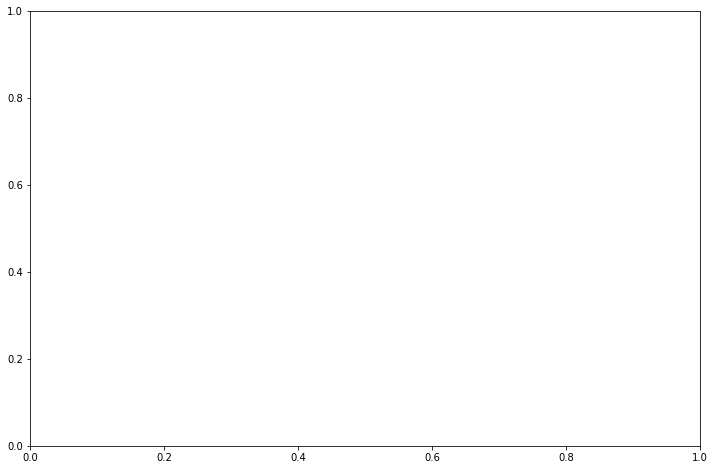

In [479]:
#                       outlier_ratio=0.3,  # ratio of the outliers (Y)
#                      leverage_outlier_ratio = 0.1, # ratio of data outlying in X
#                      randomize_coefficients=True,
#                      coefficients_range=(1, 50),
#                      x_ms = (0,10),        # not outlying x  ~ N(mean, sd)
#                      x_out_ms = (100,10),  # outlying x  ~ N(mean, sd)
#                      e_ms = (0, 1),        # not outlying y  e ~ N(mean, sd)
#                      e_out_ms = (-1,400), # outlying y   e ~ N(mean, std)  or   ~LogN(mean, sd)  or ~Exp(std)
#                      e_out_dist='n'




X1, y1, X_clean1, y_clean1 = generate_data_ND(700, 2, leverage_outlier_ratio = 0.0, x_out_ms = (0,1), outlier_ratio=0.4 , e_ms = (0, 200), e_out_dist='e', e_out_ms = (50,400) , randomize_coefficients=False);


# X, y, X_clean, y_clean = generate_data_ND(100, 2, e_out_ms = (30,40), leverage_outlier_ratio = 0.3);

plt.figure(figsize=(12,8))
plt.scatter(x=X, y=y, cmap= plt.get_cmap('spring'))
plt.scatter(x=X_clean, y=y_clean, c='g')
plt.scatter(x=X1, y=y1, c='y')
plt.scatter(x=X_clean1, y=y_clean1, c='r')
 

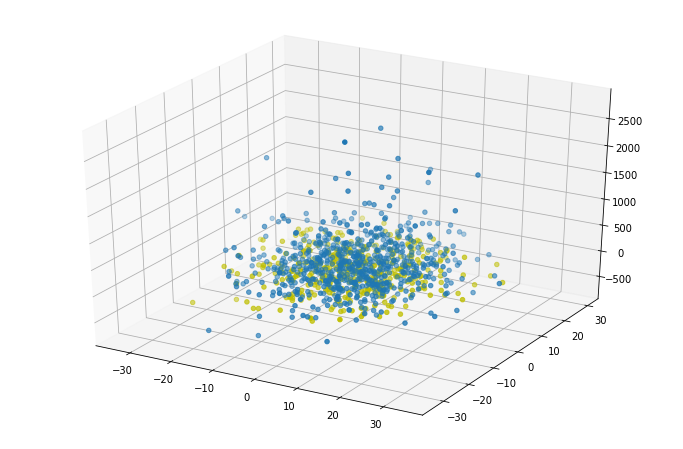

In [480]:
#X1, y1, X_clean1, y_clean1

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, projection='3d')


# ax.scatter(X[:,0], X[:,1], y, cmap= plt.get_cmap('spring'))
# ax.scatter(X_clean[:,0], X_clean[:,1], y_clean, c='g')

ax.scatter(X1[:,1], X1[:,0], y1, cmap= plt.get_cmap('spring'))
ax.scatter(X_clean1[:,0], X_clean1[:,1], y_clean1, c='y')


# plt.scatter(x=X, y=y, cmap= plt.get_cmap('spring'))
# plt.scatter(x=X_clean, y=y_clean, c='g')
# plt.scatter(x=X1, y=y1, c='y')
# plt.scatter(x=X_clean1, y=y_clean1, c='r')
 

plt.show()
